<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Water-vapor-retrieval-using-MYD05-data" data-toc-modified-id="Water-vapor-retrieval-using-MYD05-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Water vapor retrieval using MYD05 data</a></span><ul class="toc-item"><li><span><a href="#Near-IR-vs.-IR-datasets" data-toc-modified-id="Near-IR-vs.-IR-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Near IR vs. IR datasets</a></span></li><li><span><a href="#What-this-notebook-does" data-toc-modified-id="What-this-notebook-does-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>What this notebook does</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Read-in-the-1km-and-5km-water-vapor-files" data-toc-modified-id="Read-in-the-1km-and-5km-water-vapor-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the 1km and 5km water vapor files</a></span><ul class="toc-item"><li><span><a href="#Start-with-the-lats/lons-for-1km-and-5km" data-toc-modified-id="Start-with-the-lats/lons-for-1km-and-5km-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Start with the lats/lons for 1km and 5km</a></span></li><li><span><a href="#Get-the-IR-vapor-plus-5-of-its-attributes" data-toc-modified-id="Get-the-IR-vapor-plus-5-of-its-attributes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Get the IR vapor plus 5 of its attributes</a></span></li><li><span><a href="#Replace--9999-with-np.nan" data-toc-modified-id="Replace--9999-with-np.nan-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Replace -9999 with np.nan</a></span></li><li><span><a href="#now-scale-the-data-and-histogram-it" data-toc-modified-id="now-scale-the-data-and-histogram-it-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>now scale the data and histogram it</a></span></li><li><span><a href="#Repeat-for-the-1-km-near-ir-data" data-toc-modified-id="Repeat-for-the-1-km-near-ir-data-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Repeat for the 1 km near-ir data</a></span></li><li><span><a href="#Note-that-the--scaled-wv-values-are-similar-between-near_ir-and-ir-retrievals" data-toc-modified-id="Note-that-the--scaled-wv-values-are-similar-between-near_ir-and-ir-retrievals-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Note that the  scaled wv values are similar between near_ir and ir retrievals</a></span><ul class="toc-item"><li><span><a href="#Resample-the-5km-IR-retrieval-onto-a-laea-xy-grid" data-toc-modified-id="Resample-the-5km-IR-retrieval-onto-a-laea-xy-grid-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Resample the 5km IR retrieval onto a laea xy grid</a></span></li><li><span><a href="#Resample-the-1km-near-ir-water-vapor-on-the-same-grid" data-toc-modified-id="Resample-the-1km-near-ir-water-vapor-on-the-same-grid-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Resample the 1km near-ir water vapor on the same grid</a></span></li></ul></li></ul></li><li><span><a href="#Map-the-data" data-toc-modified-id="Map-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Map the data</a></span><ul class="toc-item"><li><span><a href="#now-use-the-1-km-MYD03-lons-and-lats-to-get-a-full-resolution-xy-grid" data-toc-modified-id="now-use-the-1-km-MYD03-lons-and-lats-to-get-a-full-resolution-xy-grid-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>now use the 1 km MYD03 lons and lats to get a full resolution xy grid</a></span></li></ul></li><li><span><a href="#Save-the-mapped-images" data-toc-modified-id="Save-the-mapped-images-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the mapped images</a></span><ul class="toc-item"><li><span><a href="#Now-save-these-three-images-plus-their-area_def's-for-future-plotting" data-toc-modified-id="Now-save-these-three-images-plus-their-area_def's-for-future-plotting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Now save these three images plus their area_def's for future plotting</a></span></li><li><span><a href="#Create-a-directory-to-hold-the-images-and-area_def-dictionaries" data-toc-modified-id="Create-a-directory-to-hold-the-images-and-area_def-dictionaries-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Create a directory to hold the images and area_def dictionaries</a></span></li><li><span><a href="#Here's-a-function-that-writes-the-image-plus-metadata-to-npz-and-json-files" data-toc-modified-id="Here's-a-function-that-writes-the-image-plus-metadata-to-npz-and-json-files-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Here's a function that writes the image plus metadata to npz and json files</a></span></li><li><span><a href="#Write-out-images,-putting-useful-metadeta-in-metadata_dict" data-toc-modified-id="Write-out-images,-putting-useful-metadeta-in-metadata_dict-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Write out images, putting useful metadeta in metadata_dict</a></span></li></ul></li></ul></div>

# Water vapor retrieval using MYD05 data

## Near IR vs. IR datasets

As we will discuss in class, Modis provides two separate measurements on the column integrated water vapor.
The high level overview is given in the [modis water vapor products](https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/water-vapor/MYD05_L2).  Basically the reason for two separate retrievals is that they have different strengths and weaknesses.

* Near Infrared Retrieval

  * Uses reflected photons in two separate water vapor absorption bands 

  * Strengths
  
    * 1 km spatial resolution at nadir
    
    * retrieval doesn't depend on temperature difference between vapor and surface
    
    * more accurate than longwave
   
  * Weaknesses
  
    * Doesn't work at night
    
    * Doesn't work over dark surfaces (can work over ocean
      as long as the pixel is reflecting direct sunlight ("sunglint")
      
    * Needs separate MYD03 file for lats/lons
      
* Infrared Retrieval

  * Uses the water absorption bands near 11 microns
  
  * Strengths
  
    * Works day/night, over dark surfaces
    
    * 5 km lat/lons included in file
    
  * Weaknesses
  
    * 5 km pixels at nadir
  
    * Doesn't work when most of the vapor is in the boundary layer and has about the same temperature
      as the surface

## What this notebook does

1. Reads a MYD03 file named m3_file_2018_10_1.hdf and a MYD05 file named myd05_l2_10_7.hdf located
   in a301.data_dir and grabs latitudes, longitudes and two arrays: Water_Vapor_Near_Infrared and 
   Water_Vapor_Infrared
   
1. Scales the water vapar arrays by scale_factor and offset to produce the retrieved column water vapor
   in cm
   
1. Maps the two arrays onto the same 5km array for direct comparison

1. Maps the near_ir array onto a 1 km grid to show the full resolution.

1. Writes the three images with their area_def map information and metadata out to new folders in
   a301_code/map_data/wv_maps as npz files (for the images) and json files (for the metadata)

# Setup

1. Download the MYD05 granule that corresponds to your 5 minute date/time.  It should look something like:

         MYD05_L2.A2013222.2105.061.2018048043105.hdf
         
1. Rename it to **myd05_l2_10_7.hdf** and copy to a301.data_dir

1. Run the checkup program:

         python -m a301.install_tests.wv_resample_test
         
         
   which should produce something like this:
 
         working on /Users/phil/repos/a301_code/data/m3_file_2018_10_1.hdf, originally was MYD03.A2013222.2105.006.2013223155808.hdf
   
         ****************************************
         lats_1km.shape, lons_1km.shape: (2040, 1354),(2040, 1354)
         ****************************************
         through
         working on /Users/phil/repos/a301_code/data/myd05_l2_10_7.hdf, originally was MYD05_L2.A2013222.2105.061.2018048043105.hdf
         ****************************************
         nearir vapor array shape is: (2040, 1354)
         ****************************************
         ****************************************
         ir vapor array shape is: (408, 270)
         ****************************************
         ****************************************
         lats_5km arrayshape is: (408, 270)
         ****************************************
         ****************************************
         lons_5km arrayshape is: (408, 270)
         ****************************************
         was able to regrid the nearir image, xy shape is (2244, 1489)
         was able to regrid the ir image, xy shape is (448, 297)
         data looks good, ready to go


In [1]:
from matplotlib import cm

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import Image,display

#Image('figures/MYBRGB.A2016224.2100.006.2016237025650.jpg',width=600)

In [2]:
%matplotlib inline
from matplotlib import cm

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import Image,display
import a301
from a301.geometry import get_proj_params
from a301.scripts.modismeta_read import parseMeta
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import json

# Read in the 1km and 5km water vapor files

## Start with the lats/lons for 1km and 5km

In [3]:
m5_file = a301.data_dir / Path('myd05_l2_10_7.hdf')
m3_file = a301.data_dir / Path('m3_file_2018_10_1.hdf')

the_file = SD(str(m3_file), SDC.READ)
lats_1km = the_file.select('Latitude').get()
lons_1km = the_file.select('Longitude').get()
the_file.end()

the_file = SD(str(m5_file), SDC.READ)
lats_5km = the_file.select('Latitude').get()
lons_5km = the_file.select('Longitude').get()

## Get the IR vapor plus 5 of its attributes

Store the data in a numpy array, and the attributes in a dictionary,
using a [dictionary comprehension](https://jakevdp.github.io/WhirlwindTourOfPython/11-list-comprehensions.html)
at line 4

In [4]:
wv_ir = the_file.select('Water_Vapor_Infrared')
attributes=['units', 'scale_factor', 'add_offset', 'valid_range', '_FillValue']
attr_dict=wv_ir.attributes()
wv_ir_attrs={k: attr_dict[k] for k in attributes}
print(f'wv_ir attributes: {pprint.pformat(wv_ir_attrs)}')
wv_ir_data = wv_ir.get()

wv_ir attributes: {'_FillValue': -9999,
 'add_offset': 0.0,
 'scale_factor': 0.0010000000474974513,
 'units': 'cm',
 'valid_range': [0, 20000]}


## Replace -9999 with np.nan

Note that this has to a happen before we scale the data by the scale_factor so the -9999 can be recognized

In [5]:
bad_data = (wv_ir_data == wv_ir_attrs['_FillValue'])
#
# next line converts to floating point so we can use np.nan
#
wv_ir_data = wv_ir_data.astype(np.float32)
wv_ir_data[bad_data]=np.nan

## now scale the data and histogram it

In [6]:
wv_ir_scaled = wv_ir_data*attr_dict['scale_factor'] + attr_dict['add_offset']

Note that we need to get rid of all nan values by taking ~ (not) np.isnan

```
plt.hist(wv_ir_scaled)
```
won't work

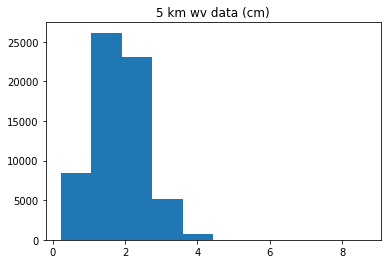

In [7]:
plt.hist(wv_ir_scaled[~np.isnan(wv_ir_scaled)])
ax=plt.gca()
ax.set_title('5 km wv data (cm)');

## Repeat for the 1 km near-ir data

Use a dictionary comprehension again to move the attributes in attrib_list into a dict at line 4

In [8]:
wv_nearir = the_file.select('Water_Vapor_Near_Infrared')
attrib_list=['unit', 'scale_factor', 'add_offset', 'valid_range', '_FillValue']
attr_dict=wv_nearir.attributes()
wv_nearir_attrs={k: attr_dict[k] for k in attrib_list}
print(f'wv_nearir attributes: {pprint.pformat(wv_nearir_attrs)}')
wv_nearir_data = wv_nearir.get()
the_file.end()

wv_nearir attributes: {'_FillValue': -9999,
 'add_offset': 0.0,
 'scale_factor': 0.0010000000474974513,
 'unit': 'cm',
 'valid_range': [0, 20000]}


In [9]:
bad_data = wv_nearir_data == wv_nearir_attrs['_FillValue']
wv_nearir_data = wv_nearir_data.astype(np.float32)
wv_nearir_data[bad_data]=np.nan
wv_nearir_scaled = wv_nearir_data*attr_dict['scale_factor'] + attr_dict['add_offset']

## Note that the  scaled wv values are similar between near_ir and ir retrievals

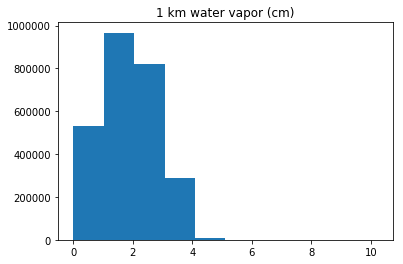

In [18]:
plt.hist(wv_nearir_scaled[~np.isnan(wv_nearir_scaled)])
ax=plt.gca()
ax.set_title('1 km water vapor (cm)');

### Resample the 5km IR retrieval onto a laea xy grid

Let swath_def.compute_optimal_bb_area choose the extent and dimensions for
the low resolution (lr) image 


In [11]:
# %load temp.md
from pyresample import  SwathDefinition, kd_tree, geometry
proj_params = get_proj_params(m5_file)
swath_def = SwathDefinition(lons_5km, lats_5km)
area_def_lr=swath_def.compute_optimal_bb_area(proj_dict=proj_params)
area_def_lr.name="ir wv retrieval modis 5 km resolution (lr=low resolution)"
area_def_lr.area_id='modis_ir_wv'
area_def_lr.job_id = area_def_lr.area_id
fill_value=-9999.
image_wv_ir = kd_tree.resample_nearest(swath_def, wv_ir_scaled.ravel(),
                                  area_def_lr, radius_of_influence=5000, 
                                      nprocs=2,fill_value=fill_value)
image_wv_ir[image_wv_ir < -9000]=np.nan
print(f'\ndump area definition:\n{area_def_lr}\n')
print((f'\nx and y pixel dimensions in meters:'
       f'\n{area_def_lr.pixel_size_x}\n{area_def_lr.pixel_size_y}\n'))


dump area definition:
Area ID: modis_ir_wv
Description: ir wv retrieval modis 5 km resolution (lr=low resolution)
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '39.45806717126055', 'lon_0': '-121.46497661987351', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 297
Number of rows: 448
Area extent: (-1240326.745046788, -1155685.6368334254, 1531068.9578429635, 1278445.143417062)


x and y pixel dimensions in meters:
9331.298662928457
5433.327634487695



/Users/phil/mb36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


### Resample the 1km near-ir water vapor on the same grid

Reuse area_def_lr for the high resolution nearir image so we can compare directly with low resolution ir

In [12]:
swath_def = SwathDefinition(lons_1km, lats_1km)
fill_value=-9999.
image_wv_nearir_lr = kd_tree.resample_nearest(swath_def, wv_nearir_scaled.ravel(),
                                  area_def_lr, radius_of_influence=5000, 
                                      nprocs=2,fill_value=fill_value)
image_wv_nearir_lr[image_wv_nearir_lr < -9000]=np.nan

/Users/phil/mb36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


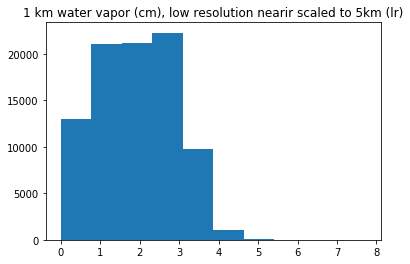

In [20]:
plt.hist(image_wv_nearir_lr[~np.isnan(image_wv_nearir_lr)])
ax=plt.gca()
ax.set_title('1 km water vapor (cm), low resolution nearir scaled to 5km (lr)');

# Map the data

## now use the 1 km MYD03 lons and lats to get a full resolution xy grid

resample the neair wv onto that grid to show full resolution image

In [13]:
### Resample the 1 km near-ir water vapor onto a 1 km grid

proj_params = get_proj_params(m3_file)
swath_def = SwathDefinition(lons_1km, lats_1km)
area_def_hr=swath_def.compute_optimal_bb_area(proj_dict=proj_params)
area_def_hr.name="near ir wv retrieval modis 1 km resolution (hr=high resolution)"
area_def_hr.area_id="wv_nearir_hr"
area_def_hr.job_id = area_def_hr.area_id
fill_value=-9999.
image_wv_nearir_hr = kd_tree.resample_nearest(swath_def, wv_nearir_scaled.ravel(),
                                  area_def_hr, radius_of_influence=5000, 
                                      nprocs=2,fill_value=fill_value)
image_wv_nearir_hr[image_wv_nearir_hr < -9000]=np.nan

/Users/phil/mb36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


# Save the mapped images
## Now save these three images plus their area_def's for future plotting

The function area_def_to_dict saves the pyresample area_def as a dict

At line 20 note that
```python
    a=getattr(area_def,key) 
```
where key='my_attribute'  is the same as
```python
    a=area_def.my_attribute
```
but you don't have to hard-code in 'my_attribute'


In [14]:
import json

def area_def_to_dict(area_def):
    """
    given an area_def, save it as a dictionary
    
    Parameters
    ----------
    
    area_def: pyresample area_def object
         
    Returns
    -------
    
    out_dict: dict containing
       area_def dictionary
         
    """
    keys=['area_id','proj_id','name','proj_dict','x_size','y_size','area_extent']
    area_dict={key:getattr(area_def,key) for key in keys}
    area_dict['proj_id']=area_dict['area_id']
    return area_dict


## Create a directory to hold the images and area_def dictionaries

In [15]:
map_dir = a301.map_dir / Path('map_data/wv_maps')
map_dir.mkdir(parents=True, exist_ok=True)

## Here's a function that writes the image plus metadata to npz and json files

We'll need to use dump_area_def when we create the metadata_dict

In [16]:
import pdb
def dump_image(image_array,metadata_dict,foldername,
              image_array_name='image'):
    """
    write an image plus mmetadata to a folder
    
    Parameters
    ----------
    
    image_array: ndarray
        the 2-d image to be saved
    
    foldername:  Path object or string
        the path to the folder that holds the image files
        
    image_array_name:  str
        the root name for the npz and json files
        i.e. image.npz and image.json
        
    Returns: None
       side effect -- an npz and a json file are written
    """
    image_file=Path(foldername) / Path(image_array_name)
    out_dict={image_array_name:image_array}
    np.savez(image_file,**out_dict)
    json_name = foldername / Path(image_array_name + '.json')
    with open(json_name,'w') as f:
        json.dump(metadata_dict,f,indent=4)
    print(f"\ndumping {image_file}\n and {json_name}\n")

## Write out images, putting useful metadeta in metadata_dict

In [17]:
image_name='wv_nearir_lr'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_lr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis near ir water vapor (cm) sampled at 5 km resolution'
metadata_dict['history']='written by level2_cartopy_resample.ipynb'
map_dir = a301.data_dir.parent / Path('map_data/wv_maps')
map_dir.mkdir(parents=True, exist_ok=True)
dump_image(image_wv_nearir_lr,metadata_dict,map_dir,image_name)

image_name='wv_nearir_hr'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_hr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis near ir water vapor (cm) sampled at 1 km resolution'
metadata_dict['history']='written by level2_cartopy_resample.ipynb'
dump_image(image_wv_nearir_hr,metadata_dict,map_dir,image_name)

image_name='wv_ir'
metadata_dict=dict(modismeta = parseMeta(m5_file))
metadata_dict['area_def']=area_def_to_dict(area_def_lr)
metadata_dict['image_name']=image_name
metadata_dict['description']='modis ir water vapor (cm) sampled at 5 km resolution'
metadata_dict['history']='written by level2_cartopy_resample.ipynb'
dump_image(image_wv_ir,metadata_dict,map_dir,image_name)


dumping /Users/phil/repos/a301_code/map_data/wv_maps/wv_nearir_lr
 and /Users/phil/repos/a301_code/map_data/wv_maps/wv_nearir_lr.json


dumping /Users/phil/repos/a301_code/map_data/wv_maps/wv_nearir_hr
 and /Users/phil/repos/a301_code/map_data/wv_maps/wv_nearir_hr.json


dumping /Users/phil/repos/a301_code/map_data/wv_maps/wv_ir
 and /Users/phil/repos/a301_code/map_data/wv_maps/wv_ir.json

